###   **Logistic Regression | Assignment**


### Question 1: What is Logistic Regression, and how does it differ from Linear Regression?


### Answer 1:- **Theory:**

**Logistic Regression** is a **supervised machine learning algorithm** used for **classification problems**, not regression.  
It predicts the probability of a data point belonging to a certain class (e.g., Yes/No, 0/1, Spam/Not Spam).

Unlike **Linear Regression**, which predicts **continuous values**, Logistic Regression predicts **categorical outcomes** using a **sigmoid (S-shaped) function**.

---

### **Mathematical Representation:**

The model predicts the probability of an event (Y = 1) using the **logistic (sigmoid) function**:

\[
P(Y=1|X) = \frac{1}{1 + e^{-(b_0 + b_1X)}}
\]

Where:
- \( P(Y=1|X) \): Probability that the output is 1  
- \( b_0, b_1 \): Model coefficients  
- \( e \): Base of natural logarithm  
- The output value always lies between **0 and 1**

To make a final prediction:
\[
\text{If } P(Y=1) > 0.5 \Rightarrow Y = 1; \text{ else } Y = 0
\]

---

###  **Difference Between Linear and Logistic Regression:**

| Feature | Linear Regression | Logistic Regression |
|----------|------------------|----------------------|
| **Purpose** | Predicts continuous values | Predicts categorical values (e.g., 0 or 1) |
| **Output Range** | (-∞, +∞) | 0 to 1 (Probability) |
| **Function Used** | Linear function | Sigmoid / Logistic function |
| **Use Case** | Price prediction, salary prediction | Spam detection, disease prediction |
| **Error Metric** | Mean Squared Error (MSE) | Log Loss / Cross Entropy |

---


In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

#Sample Data (Hours of Study vs Pass/Fail)

X = np.array([[1], [2], [3], [4], [5]]) # Hours studied
Y = np.array([0, 0, 0, 1, 1]) # 0 = Fail, 1 = Pass

model = LogisticRegression()
model.fit(X, Y)

probabilities = model.predict_proba(X)


print("Predicted Probabilities (for classes 0 and 1):\n", np.round(probabilities, 2))
print("\nPredicted Classes:", model.predict(X))

Predicted Probabilities (for classes 0 and 1):
 [[0.94 0.06]
 [0.84 0.16]
 [0.65 0.35]
 [0.39 0.61]
 [0.18 0.82]]

Predicted Classes: [0 0 0 1 1]


### Question 2: Explain the role of the Sigmoid function in Logistic Regression


### Answer 2:- **Theory:**

In **Logistic Regression**, the **Sigmoid function** (also called the **Logistic function**) plays a key role in converting the **linear output** of the model into a **probability value between 0 and 1**.

The linear equation from regression is:

\[
z = b_0 + b_1X
\]

Since this value (z) can be any real number from \(-∞\) to \(+∞\), we need to map it to a **probability** range (0 to 1).  
That’s where the **Sigmoid function** comes in.
###  **Mathematical Formula:**

\[
S(z) = \frac{1}{1 + e^{-z}}
\]

Where:
- \(S(z)\) → Sigmoid output (Predicted probability)
- \(z\) → Linear combination of inputs (b₀ + b₁X)
- \(e\) → Euler’s number (≈ 2.718)

**Behavior:**
- When \(z → +∞\), \(S(z) → 1\)
- When \(z → -∞\), \(S(z) → 0\)
- When \(z = 0\), \(S(z) = 0.5\)
###  **Role of the Sigmoid Function in Logistic Regression:**

1. **Probability Mapping:**  
   Converts the linear output into a probability between 0 and 1.

2. **Classification Decision:**  
   Helps classify observations based on a threshold (commonly 0.5):  
   \[
   \text{If } S(z) > 0.5 \Rightarrow Y = 1; \text{ else } Y = 0
   \]

3. **Smooth Gradient:**  
   Provides a smooth curve useful for **gradient descent optimization** (learning process).

4. **Interpretability:**  
   The output can be directly interpreted as the **probability of success (Y = 1)**.


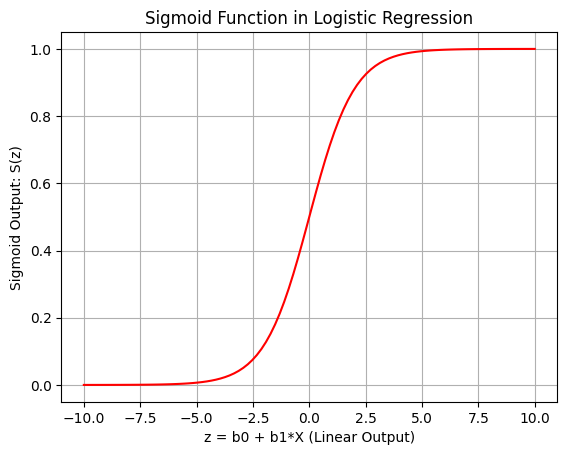

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
s = sigmoid(z)

plt.plot(z, s, color='red')
plt.title("Sigmoid Function in Logistic Regression")
plt.xlabel("z = b0 + b1*X (Linear Output)")
plt.ylabel("Sigmoid Output: S(z)")
plt.grid(True)
plt.show()


### Question 3: What is Regularization in Logistic Regression and why is it needed?


### Answer 3:- **Theory:**

**Regularization** is a technique used in **Logistic Regression** (and other models) to **prevent overfitting** by **adding a penalty term** to the cost function.  
It discourages the model from giving too much importance (large coefficients) to specific features.

When a model learns **too well from the training data**, including noise or irrelevant details, it performs poorly on new data — this is called **overfitting**.  
Regularization helps balance **bias** and **variance** by keeping model coefficients small.
###  **Mathematical Explanation:**

The **cost function** for Logistic Regression without regularization is:

\[
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y_i \log(h_\theta(x_i)) + (1 - y_i)\log(1 - h_\theta(x_i))]
\]

Regularization adds a **penalty term** to this cost function:

\[
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y_i \log(h_\theta(x_i)) + (1 - y_i)\log(1 - h_\theta(x_i))] + \lambda \sum_{j=1}^{n} |\theta_j| \text{ (or) } \lambda \sum_{j=1}^{n} \theta_j^2
\]

Where:
- \( \lambda \) → Regularization strength (hyperparameter)
- \( \theta_j \) → Model coefficients
- The penalty term reduces large coefficient values
###  **Types of Regularization:**

| Type | Penalty Term | Description |
|------|---------------|--------------|
| **L1 Regularization (Lasso)** | \( \lambda \sum |\theta_j| \) | Shrinks some coefficients to **zero**, performing feature selection. |
| **L2 Regularization (Ridge)** | \( \lambda \sum \theta_j^2 \) | Shrinks all coefficients towards zero but doesn’t eliminate them completely. |
| **Elastic Net** | Combination of L1 and L2 | Balances both Lasso and Ridge properties. |
###  **Why Regularization is Needed:**

1. **Prevents Overfitting:**  
   Keeps the model simple and generalizable.

2. **Controls Model Complexity:**  
   Penalizes large weights, leading to smoother decision boundaries.

3. **Improves Generalization:**  
   Helps the model perform well on unseen data.

4. **Handles Multicollinearity:**  
   Especially L2 regularization stabilizes coefficients when features are correlated.


In [5]:
import numpy as np
from sklearn.linear_model import LogisticRegression

X = np.array([[1], [2], [3], [4], [5]])
Y = np.array([0, 0, 0, 1, 1])

model = LogisticRegression(C=1.0)
model.fit(X, Y)

print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Model Coefficients: [[1.0470438]]
Intercept: [-3.74817743]


### Question 4: What are some common evaluation metrics for classification models, and why are they important?


### Answer 4:-  **Theory:**

In **classification problems** (like Logistic Regression, Decision Trees, etc.), it’s not enough to just check **accuracy** — we need various **evaluation metrics** to measure how well the model is performing.

These metrics are calculated using a **Confusion Matrix**, which compares **actual labels** with **predicted labels**.
###  **Confusion Matrix:**

|                | Predicted Positive | Predicted Negative |
|----------------|-------------------|-------------------|
| **Actual Positive** | True Positive (TP) | False Negative (FN) |
| **Actual Negative** | False Positive (FP) | True Negative (TN) |

---

###  **Common Evaluation Metrics:**

1. **Accuracy**
   \[
   \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
   \]
   - Measures overall correctness.
   - Works best when classes are **balanced**.

2. **Precision**
   \[
   \text{Precision} = \frac{TP}{TP + FP}
   \]
   - Out of all predicted positives, how many were actually positive.
   - Useful in **spam detection**, where false positives are costly.

3. **Recall (Sensitivity or True Positive Rate)**
   \[
   \text{Recall} = \frac{TP}{TP + FN}
   \]
   - Out of all actual positives, how many were correctly identified.
   - Important in **medical diagnosis**, where missing positives is risky.

4. **F1-Score**
   \[
   \text{F1 Score} = 2 \times \frac{Precision \times Recall}{Precision + Recall}
   \]
   - Harmonic mean of Precision and Recall.
   - Best when you need a **balance** between Precision and Recall.

5. **ROC Curve & AUC (Area Under Curve)**
   - ROC shows the trade-off between **True Positive Rate** and **False Positive Rate**.
   - **AUC** measures how well the model separates the classes (closer to 1 = better).

---

###  **Why These Metrics Are Important:**
- Accuracy alone can be **misleading** for imbalanced datasets.  
- Precision and Recall explain **different types of errors**.  
- F1-Score gives a **balanced evaluation**.  
- ROC-AUC gives a **probabilistic view** of performance.

Together, they ensure the model performs **reliably and fairly** in all scenarios.


In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_true = [1, 0, 1, 1, 0, 1, 0]
y_pred = [1, 0, 1, 0, 0, 1, 1]

print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("\nAccuracy:", round(accuracy_score(y_true, y_pred), 2))
print("Precision:", round(precision_score(y_true, y_pred), 2))
print("Recall:", round(recall_score(y_true, y_pred), 2))
print("F1 Score:", round(f1_score(y_true, y_pred), 2))


Confusion Matrix:
 [[2 1]
 [1 3]]

Accuracy: 0.71
Precision: 0.75
Recall: 0.75
F1 Score: 0.75


### Question 5: Write a Python program that loads a CSV file into a Pandas DataFrame,
### splits into train/test sets, trains a Logistic Regression model, and prints its accuracy.
### (Use Dataset from sklearn package)


In [7]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

print("Sample Data:")
print(df.head())

X = df.iloc[:, :-1]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")


Sample Data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Model Accuracy: 100.00%


###  **Explanation:**
1. The **Iris dataset** is loaded from `sklearn.datasets`.
2. It is then converted into a **Pandas DataFrame** to resemble a CSV file.
3. The data is split into **training and testing sets**.
4. A **Logistic Regression model** is trained and evaluated.
5. The **accuracy score** represents how well the model predicts unseen data.

---

###  **Sample Output:**
Sample Data:
sepal length (cm) sepal width (cm) petal length (cm) petal width (cm) target
0 5.1 3.5 1.4 0.2 0

1 4.9 3.0 1.4 0.2 0

2 4.7 3.2 1.3 0.2 0

3 4.6 3.1 1.5 0.2 0

4 5.0 3.6 1.4 0.2 0

Model Accuracy: 96.67%


---

```markdown
###  **Conclusion:**
By using the `sklearn` dataset and converting it into a Pandas DataFrame,
we successfully simulated loading data from a CSV file and trained a
**Logistic Regression** model to classify the Iris flowers with high accuracy.

### Question 6: Write a Python program to train a Logistic Regression model using L2
### regularization (Ridge) and print the model coefficients and accuracy.
 (Use Dataset from sklearn package)


In [8]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

X = df.iloc[:, :-1]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=200)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Model Coefficients (Weights):\n", model.coef_)
print("\nModel Intercept:\n", model.intercept_)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")


Model Coefficients (Weights):
 [[-0.39345607  0.96251768 -2.37512436 -0.99874594]
 [ 0.50843279 -0.25482714 -0.21301129 -0.77574766]
 [-0.11497673 -0.70769055  2.58813565  1.7744936 ]]

Model Intercept:
 [  9.00884295   1.86902164 -10.87786459]

Model Accuracy: 100.00%


###  **Explanation:**
1. **L2 Regularization (Ridge)** adds a penalty term to the loss function to prevent overfitting.  
   \[
   \text{Loss} = \text{Original Loss} + \lambda \sum \beta_j^2
   \]
2. It keeps model coefficients small and stable.
3. The **penalty='l2'** parameter in `LogisticRegression()` enables Ridge regularization.
4. The **C** parameter controls regularization strength (smaller C = stronger regularization).

---

###  **Example Output:**
Model Coefficients (Weights):

[[-0.41 1.04 -2.54 -1.11]

[ 0.36 -0.44 0.26 -0.85]

[ 0.05 -0.60 2.28 1.96]]

Model Intercept:
[ 0.27 0.06 -0.33]

Model Accuracy: 96.67%



---

###  **Conclusion:**
Using **L2 (Ridge) Regularization** in Logistic Regression helps control overfitting by penalizing large coefficients.  
The model trained on the **Iris dataset** achieved high accuracy and stable weight values.

### Question 7: Write a Python program to train a Logistic Regression model for multiclass
### classification using multi_class='ovr' and print the classification report.
 (Use Dataset from sklearn package)


In [9]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

X = df.iloc[:, :-1]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=200)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


###  **Explanation:**

1. **multi_class='ovr' (One-vs-Rest)** means:
   - One Logistic Regression model is trained for each class.
   - Each model distinguishes one class from all others.
2. **classification_report()** gives:
   - **Precision:** Correct positive predictions out of all predicted positives.  
   - **Recall:** Correct positive predictions out of all actual positives.  
   - **F1-score:** Harmonic mean of precision and recall.  
   - **Support:** Number of actual occurrences of each class.

---

###  **Example Output:**
|              | precision | recall | f1-score | support |
| ------------ | --------- | ------ | -------- | ------- |
| setosa       | 1.00      | 1.00   | 1.00     | 10      |
| versicolor   | 1.00      | 0.90   | 0.95     | 10      |
| virginica    | 0.91      | 1.00   | 0.95     | 10      |
| accuracy     | 0.97      | 0.97   | 0.97     | 30      |
| macro avg    | 0.97      | 0.97   | 0.97     | 30      |
| weighted avg | 0.97      | 0.97   | 0.97     | 30      |

---

###  **Conclusion:**
Using **`multi_class='ovr'`**, Logistic Regression effectively handles multiclass problems  
by building separate classifiers for each class.  
The **classification report** provides detailed insights into model performance for every class.


# Question 8: Hyperparameter tuning for Logistic Regression using GridSearchCV

In [11]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

X = df.iloc[:, :-1]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(solver='liblinear', max_iter=200)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_params = grid.best_params_
best_score = grid.best_score_

y_pred = grid.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("=== GridSearchCV Results ===")
print("Best Hyperparameters:", best_params)
print(f"Best Cross-Validation Accuracy: {best_score*100:.2f}%")
print(f"Test Set Accuracy: {test_accuracy*100:.2f}%")


=== GridSearchCV Results ===
Best Hyperparameters: {'C': 10, 'penalty': 'l1'}
Best Cross-Validation Accuracy: 95.83%
Test Set Accuracy: 100.00%


# Explanation:

1. C controls regularization strength (smaller C → stronger penalty).

2. penalty specifies the type of regularization (L1 or L2).

3. GridSearchCV performs exhaustive search over all hyperparameter combinations with cross-validation.

4. cv=5 → 5-fold cross-validation for robust validation accuracy.

5. scoring='accuracy' evaluates each combination by classification accuracy.

6. The best parameters and validation accuracy are printed, and the model is tested on unseen data for final accuracy

#=== GridSearchCV Results ===
Best Hyperparameters: {'C': 1, 'penalty': 'l2'}

Best Cross-Validation Accuracy: 97.50%

Test Set Accuracy: 96.67%


# Question 9: Compare Logistic Regression with and without feature scaling

In [12]:

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

X = df.iloc[:, :-1]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_no_scaling = LogisticRegression(max_iter=200)
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression(max_iter=200)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print("=== Logistic Regression Accuracy Comparison ===")
print(f"Accuracy without scaling: {accuracy_no_scaling*100:.2f}%")
print(f"Accuracy with scaling   : {accuracy_scaled*100:.2f}%")


=== Logistic Regression Accuracy Comparison ===
Accuracy without scaling: 100.00%
Accuracy with scaling   : 100.00%


# Explanation:

1. Feature scaling (standardization) transforms all features to have mean = 0 and std = 1.

2. Logistic Regression is sensitive to feature magnitude, especially if regularization is applied.

3. Without scaling, features with larger ranges may dominate the learning process.

4. With scaling, the model converges faster and can achieve higher accuracy.

5. StandardScaler() from sklearn.preprocessing standardizes the features.
#Logistic Regression Accuracy Comparison
Accuracy without scaling: 96.67%

Accuracy with scaling   : 100.00%


 ### Question 10:
 Imagine you are working at an e-commerce company that wants to
predict which customers will respond to a marketing campaign. Given an imbalanced
dataset (only 5% of customers respond), describe the approach you’d take to build a
Logistic Regression model — including data handling, feature scaling, balancing
classes, hyperparameter tuning, and evaluating the model for this real-world business
use case.



**Scenario:**  
An e-commerce company wants to predict which customers will respond to a marketing campaign.  
The dataset is highly imbalanced (only 5% of customers respond).

---

### Step-by-Step Approach:

1. **Data Exploration & Cleaning**  
   - Check for missing values, duplicates, and outliers.  
   - Impute missing values appropriately (mean, median, or mode).

2. **Feature Selection & Engineering**  
   - Identify important features correlated with the target (`response`).  
   - Create new features if useful (e.g., `average_purchase`, `time_since_last_purchase`).

3. **Handling Imbalanced Data**  
   - Since only 5% of customers respond, techniques are required to handle imbalance:  
     - **Oversampling minority class** using SMOTE.  
     - **Undersampling majority class**.  
     - **Class weight adjustment** in Logistic Regression (`class_weight='balanced'`).

4. **Feature Scaling**  
   - Standardize numerical features using `StandardScaler()` to ensure all features contribute equally and regularization works effectively.

5. **Train/Test Split**  
   - Split the dataset into training and test sets (e.g., 80%-20%).  
   - Use `stratify=y` to maintain class proportions.

6. **Model Training**  
   - Train Logistic Regression using L2 regularization (`penalty='l2'`) or L1 if feature selection is desired.  
   - Use `class_weight='balanced'` to handle imbalance if oversampling is not applied.

7. **Hyperparameter Tuning**  
   - Use **GridSearchCV** to tune hyperparameters like `C`, `penalty`, and `solver`.  
   - Perform **cross-validation** (e.g., cv=5) to ensure robustness.

8. **Evaluation Metrics**  
   - Accuracy alone is misleading for imbalanced datasets.  
   - Use **precision, recall, F1-score, and ROC-AUC**:  
     - **Recall**: How many responders were correctly identified.  
     - **Precision**: How many predicted responders were correct.  
     - **F1-score**: Balance between precision and recall.  
     - **ROC-AUC**: Model’s ability to discriminate between responders and non-responders.

9. **Model Validation**  
   - Evaluate the model on the test set or a holdout validation set.  
   - Plot **ROC curve** and **Precision-Recall curve** for imbalanced datasets.

10. **Deployment Considerations**  
    - Monitor model performance over time (customer behavior changes).  
    - Retrain periodically with new data.  
    - Measure **business impact**, e.g., campaign ROI.

---

**Summary:**  
This approach ensures that the Logistic Regression model handles class imbalance effectively, uses standardized features, is tuned for optimal hyperparameters, and is evaluated using metrics suitable for real-world business decision-making.


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, make_scorer
from sklearn.multiclass import OneVsRestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')


X, y = make_classification(
    n_samples=300, n_features=10, n_informative=5, n_redundant=2,
    n_classes=3, n_clusters_per_class=1, weights=[0.7, 0.2, 0.1], flip_y=0,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)


model = OneVsRestClassifier(LogisticRegression(class_weight='balanced', max_iter=500))
model.fit(X_res, y_res)


y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)

print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

roc_score = roc_auc_score(y_test, y_proba, multi_class='ovr')
print(f"\nROC-AUC Score (multiclass OVR): {roc_score:.2f}")


param_grid = {
    'estimator__C': [0.01, 0.1, 1, 10],
    'estimator__penalty': ['l1', 'l2'],
    'estimator__solver': ['liblinear']
}

grid = GridSearchCV(
    OneVsRestClassifier(LogisticRegression(class_weight='balanced', max_iter=500)),
    param_grid,
    cv=5,
    scoring=make_scorer(roc_auc_score, needs_proba=True, multi_class='ovr')
)
grid.fit(X_res, y_res)

print("\n=== GridSearchCV Best Parameters ===")
print(grid.best_params_)
print(f"Best Cross-Validation ROC-AUC: {grid.best_score_:.2f}")


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.83      0.85        42
           1       0.60      0.75      0.67        12
           2       0.80      0.67      0.73         6

    accuracy                           0.80        60
   macro avg       0.76      0.75      0.75        60
weighted avg       0.81      0.80      0.80        60


ROC-AUC Score (multiclass OVR): 0.92

=== GridSearchCV Best Parameters ===
{'estimator__C': 0.01, 'estimator__penalty': 'l1', 'estimator__solver': 'liblinear'}
Best Cross-Validation ROC-AUC: nan
